In [1]:
import pandas as pd
import gzip
import json
import matplotlib.pyplot as plt

In [2]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [3]:
df = getDF('Office_Products_5.json.gz')

In [4]:
metadata_df = getDF('meta_Office_Products.json.gz')

In [5]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,True,"11 7, 2017",A2NIJTYWADLK57,0140503528,{'Format:': ' Board book'},cotton clay,kids like story BUT while i really wanted a bo...,"good story, small size book though",1510012800,NaN,NaN
1,4.0,True,"03 7, 2017",A2827D8EEURMP4,0140503528,{'Format:': ' Hardcover'},emankcin,Bought this used and it came in great conditio...,Good,1488844800,NaN,NaN
2,5.0,True,"06 25, 2016",APB6087F4J09J,0140503528,{'Format:': ' Board book'},Starbucks Fan,Every story and book about Corduroy is Fantast...,Best Books for All Children,1466812800,NaN,NaN
3,5.0,True,"02 21, 2016",A2DHERRZIPFU7X,0140503528,{'Format:': ' Paperback'},Caitlyn Jacobson,I purchased this book for my first grade class...,Great for Math!,1456012800,NaN,NaN
4,5.0,False,"08 2, 2015",A2XCLJRGFANRC,0140503528,{'Format:': ' Hardcover'},E. Ervin,Having spent numerous years in an elementary s...,Love Corduroy,1438473600,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800357 entries, 0 to 800356
Data columns (total 12 columns):
overall           800357 non-null float64
verified          800357 non-null bool
reviewTime        800357 non-null object
reviewerID        800357 non-null object
asin              800357 non-null object
style             501427 non-null object
reviewerName      800217 non-null object
reviewText        800144 non-null object
summary           800228 non-null object
unixReviewTime    800357 non-null int64
vote              88817 non-null object
image             11302 non-null object
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 74.0+ MB


In [7]:
df.isnull().values.sum()

1800007

### Number of reviews

In [8]:
df.shape[0]

800357

In [9]:
df.shape[1]

12

### Number of reviewers

In [10]:
df.reviewerID.nunique()

101501

### Number of Products

In [11]:
df.asin.nunique()

27965

### Number of Rating classes

In [12]:
df.overall.nunique()

5

### Rating distribution

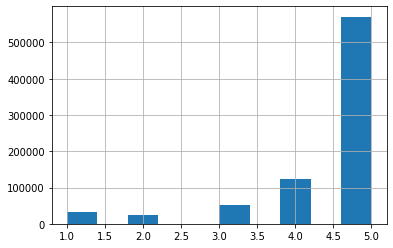

In [13]:
df.overall.astype(int).hist()

In [14]:
set(df.overall)

{1.0, 2.0, 3.0, 4.0, 5.0}

In [15]:
df.describe()

,overall,unixReviewTime
count,800357.000000,8.003570e+05
mean,4.471100,1.442901e+09
std,1.015676,5.853007e+07
min,1.000000,9.396000e+08
25%,4.000000,1.415664e+09
50%,5.000000,1.451952e+09
75%,5.000000,1.483056e+09
max,5.000000,1.538438e+09


### Average Rating 4.47 Min rating 1 Max rating 5

### Verified Reviews Distribution

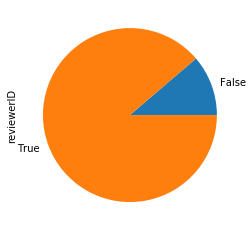

In [16]:
df.groupby('verified')['reviewerID'].count().plot.pie()

In [17]:
df[df['style'] != None].count()

overall           800357
verified          800357
reviewTime        800357
reviewerID        800357
asin              800357
style             501427
reviewerName      800217
reviewText        800144
summary           800228
unixReviewTime    800357
vote               88817
image              11302
dtype: int64

In [18]:
df = df.dropna(subset=['style'])

In [19]:
df['style'] = df['style'].apply(lambda x:x.get('Format:'))

In [20]:
df['style'].head()

0     Board book
1      Hardcover
2     Board book
3      Paperback
4      Hardcover
Name: style, dtype: object

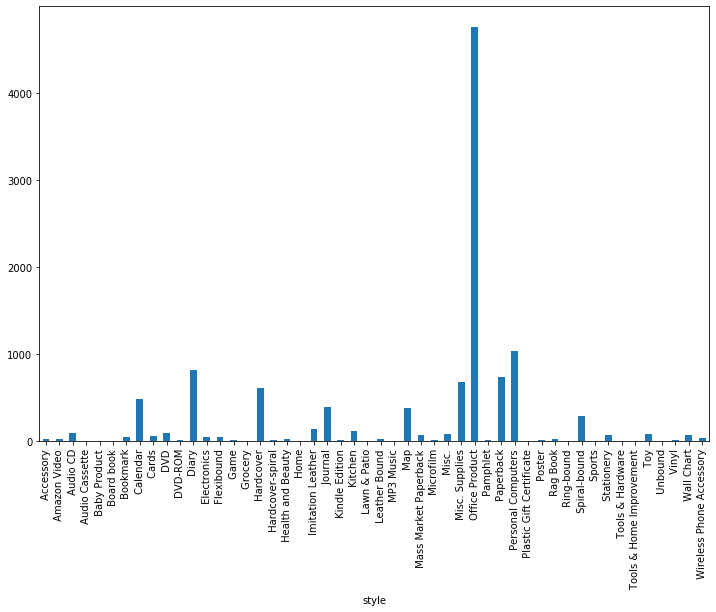

In [36]:
plt.figure(figsize = (12,8))
df.groupby('style')['reviewerID'].count().plot.bar()

### review time

In [22]:
type(df['reviewTime'][0])

str

In [23]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

### Number of reviews per year

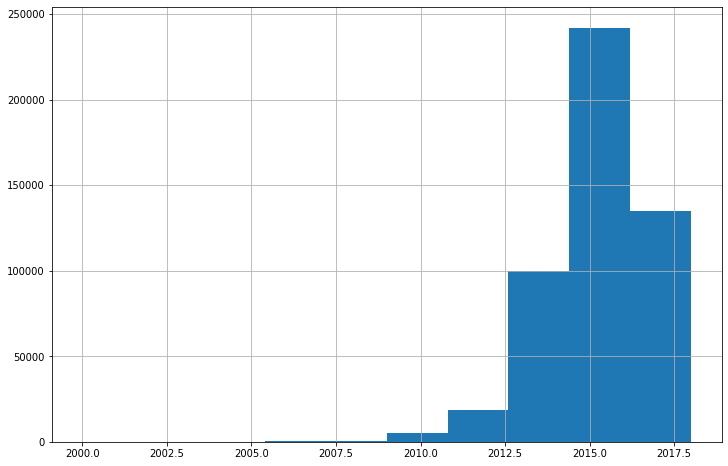

In [24]:
plt.figure(figsize = (12,8))
df['reviewTime'].dt.year.hist()

### Number of reviews per month

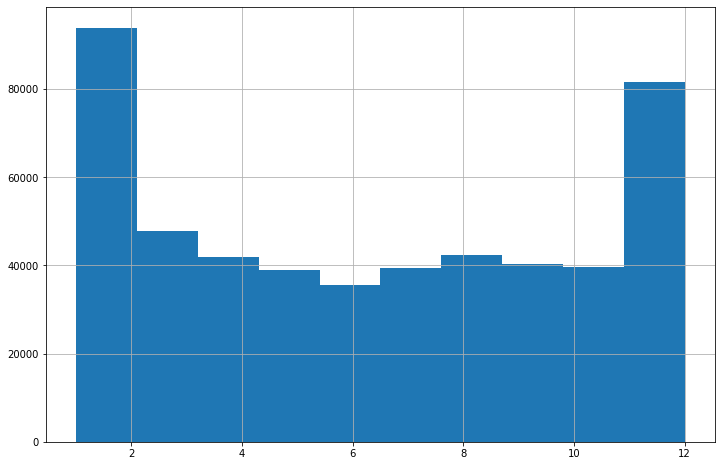

In [25]:
plt.figure(figsize = (12,8))
df['reviewTime'].dt.month.hist()

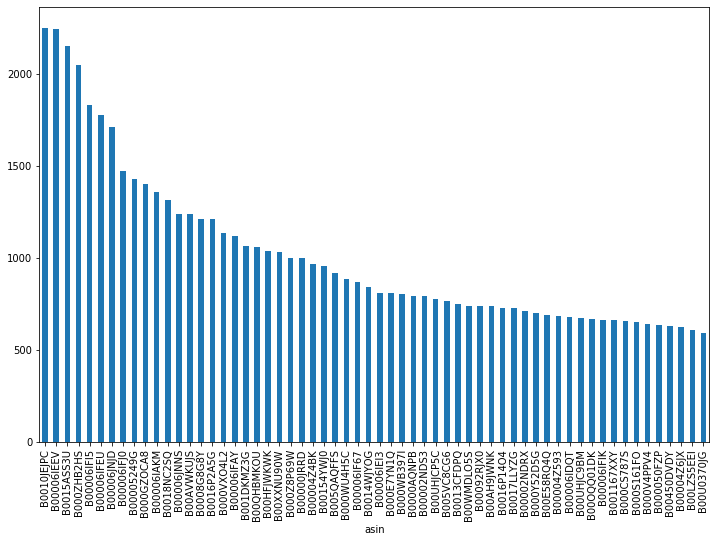

In [26]:
plt.figure(figsize = (12,8))
df.groupby('asin')['reviewerID'].count().nlargest(60).plot.bar()

In [27]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315644 entries, 0 to 315389
Data columns (total 18 columns):
category        299054 non-null object
tech1           230440 non-null object
description     275894 non-null object
title           315636 non-null object
brand           310777 non-null object
rank            312965 non-null object
also_view       92428 non-null object
main_cat        310623 non-null object
similar_item    120561 non-null object
date            275884 non-null object
price           170223 non-null object
asin            315644 non-null object
feature         256556 non-null object
also_buy        99107 non-null object
image           171647 non-null object
details         15393 non-null object
tech2           194 non-null object
fit             42 non-null object
dtypes: object(18)
memory usage: 45.8+ MB


In [28]:
metadata_df.head()

,category,tech1,description,title,brand,rank,also_view,main_cat,similar_item,date,price,asin,feature,also_buy,image,details,tech2,fit
0,"[Office Products, Office & School Supplies, Ed...","{'Brand Name': 'STL Distributors', 'Item Weigh...",[Sequential Spelling is based on the classic O...,Sequential Spelling Level 1 Bundle with Studen...,STL Distributors,">#439,654 in Office Products (See top 100)>#3,...","[1935943065, 1935943073, B00IJH9Q4M, 002115021...",Office Products,"[{'asin': '', 'href': '', 'name': 'Sequential ...","August 15, 2014",$32.90,0012624861,NaN,NaN,NaN,NaN,NaN,NaN
1,"[Office Products, Office & School Supplies, Ed...",NaN,"[Unusual book, , ]","Mathematics, Applications and Concepts, Course...",bailey,"3,839,628inBooks(",NaN,Books,NaN,NaN,$8.62,0078652669,NaN,NaN,NaN,NaN,NaN,NaN
3,"[Office Products, Office & School Supplies, Ed...","{'Brand Name': 'Ingram Book & Distributor', 'I...",[Corduroy the bear goes to the launderette wit...,A Pocket for Corduroy,Ingram Book & Distributor,">#422,894 in Office Products (See top 100)>#3,...",[0140501738],Office Products,NaN,"September 14, 2006",$0.95,0140503528,[9780140503524],"[0140501738, 0448421917, 0670063428, 042528875...",NaN,NaN,NaN,NaN
4,"[Office Products, Office & School Supplies, Ed...",NaN,[WHAT EVERYONE NEEDS TO KNOW About This Series...,Social Entrepreneurship: What Everyone Needs t...,Visit Amazon's David Bornstein Page,"110,732inBooks(","[0195334760, 1586489569, 1613630328, 142210406...",Books,NaN,NaN,NaN,0195396332,NaN,"[0195334760, 1613630328, 1422104060, 158648956...",NaN,NaN,NaN,NaN
5,"[Office Products, Office & School Supplies, Bo...","{'Brand Name': 'EKLOEN', 'Item Weight': '5.3 o...",[A good helper to help you record your reading...,EKLOEN Mixed Designs of Antiqued Bronze Colour...,EKLOEN,">#43,748 in Office Products (See top 100)>#300...",NaN,Office Products,"[{'asin': '', 'href': '', 'name': 'EKLOEN Mixe...","November 8, 2015",$17.50,0245109919,"[It is not only the bookmarks, but also art, I...","[B00BLY6POE, B00G8WV5U8, 0307591662, B019XJZHQ...",[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN


In [29]:
metadata_df.size

5681592

In [30]:
metadata_df.shape

(315644, 18)

In [31]:
combined_df = pd.merge(df, metadata_df, how='left', on='asin') 

In [32]:
combined_df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,...,main_cat,similar_item,date,price,feature,also_buy,image_y,details,tech2,fit
0,4.0,True,2017-11-07,A2NIJTYWADLK57,0140503528,Board book,cotton clay,kids like story BUT while i really wanted a bo...,"good story, small size book though",1510012800,...,Office Products,NaN,"September 14, 2006",$0.95,[9780140503524],"[0140501738, 0448421917, 0670063428, 042528875...",NaN,NaN,NaN,NaN
1,4.0,True,2017-03-07,A2827D8EEURMP4,0140503528,Hardcover,emankcin,Bought this used and it came in great conditio...,Good,1488844800,...,Office Products,NaN,"September 14, 2006",$0.95,[9780140503524],"[0140501738, 0448421917, 0670063428, 042528875...",NaN,NaN,NaN,NaN
2,5.0,True,2016-06-25,APB6087F4J09J,0140503528,Board book,Starbucks Fan,Every story and book about Corduroy is Fantast...,Best Books for All Children,1466812800,...,Office Products,NaN,"September 14, 2006",$0.95,[9780140503524],"[0140501738, 0448421917, 0670063428, 042528875...",NaN,NaN,NaN,NaN
3,5.0,True,2016-02-21,A2DHERRZIPFU7X,0140503528,Paperback,Caitlyn Jacobson,I purchased this book for my first grade class...,Great for Math!,1456012800,...,Office Products,NaN,"September 14, 2006",$0.95,[9780140503524],"[0140501738, 0448421917, 0670063428, 042528875...",NaN,NaN,NaN,NaN
4,5.0,False,2015-08-02,A2XCLJRGFANRC,0140503528,Hardcover,E. Ervin,Having spent numerous years in an elementary s...,Love Corduroy,1438473600,...,Office Products,NaN,"September 14, 2006",$0.95,[9780140503524],"[0140501738, 0448421917, 0670063428, 042528875...",NaN,NaN,NaN,NaN


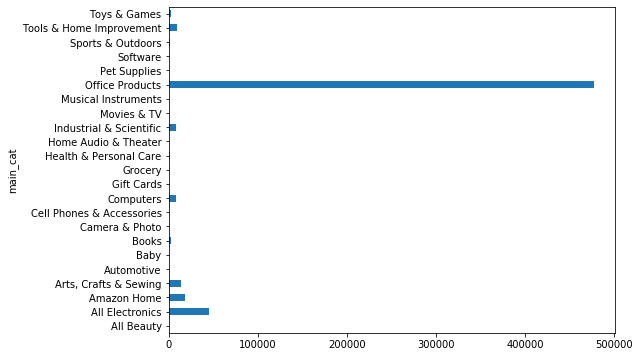

In [33]:
plt.figure(figsize = (8,6))
combined_df.groupby('main_cat')['reviewerID'].count().plot.barh()